# Machine Learning
teknik yang mencoba mendekati Artifical Intelligence.

## Terminologi
- dataset
- features (kolom yg penting di dataset untuk model machine learning kita)
- model (hasil machine learning nya, bisa menerima input dan memberi output)

## Process
1. data collection
2. data preparation
3. training (membuat dan men-train model machine learning)
4. evaluation
5. tuning

machine learning menggunakan algoritma untuk menyelesaikan sebuah masalah. Jadi kita tinggal pilih algoritma nya, lalu masukkan data, dan jadilah sebuah model machine learning.

dataset gender, umur + target berat badan --> machine learning --> model machine learning bisa menerima input gender, umur lalu memberi output berat badan.

## Supervised Machine Learning
ada target

### target adalah angka
dataset 1 fitur: luas rumah, target: harga rumah --> machine learning (algoritma linear *regression*/ polynomial regression)--> model yang bisa menebak harga rumah jika diberikan luas rumah

### target adalah label
misalkan pisahin gambar jadi pohon/ manusia. misalkan pisahin rumah jadi tipe apartemen/ rumah tanah/ kos-kosan.

menggunakan algoritma *classification*

## Unsupervised Machine Learning
tidak ada target

dataset isi konten email --> machine learning (*clustering*, pilih algoritma clustering, pilih mau berapa cluster) --> model yang bisa kelompokin email yang mirip2 jadi 1

selain itu ada juga teknik yang kita gunakan untuk mengurangi jumlah fitur (bukan dihapus fiturnya, tapi hanya dicampur) PCA.

# Regression
model machine learning yang memberi output sebuah angka

## Linear Regression
mencari fungsi matematik yang membentuk garis lurus, diberikan data kita (yang kita plot bentuk scatter plot).

In [73]:
import numpy as np

# untuk visualisasi
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# untuk linear regression
from sklearn.linear_model import LinearRegression
# untuk polynomial regression
from sklearn.preprocessing import PolynomialFeatures
# untuk import data asli
from sklearn import datasets 

# untuk memisahkan data jadi training dan testing data
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'Dummy data harga rumah')

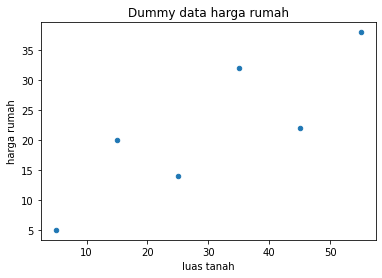

In [13]:
# membuat dummy data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

pd.DataFrame({"luas tanah":x.reshape(6,), "harga rumah":y}).plot.scatter(x="luas tanah", y="harga rumah")
plt.title("Dummy data harga rumah")

In [14]:
# siapin data - skip
# buat model machine learning, pilih algoritma linear regression
model = LinearRegression() # bikin model
model.fit(x, y) # training model

model

LinearRegression()

In [17]:
# cobain pake model nya, kasi input (x, luas tanah) dan dapat output (y, harga rumah)
model.predict([[30]])

array([21.83333333])

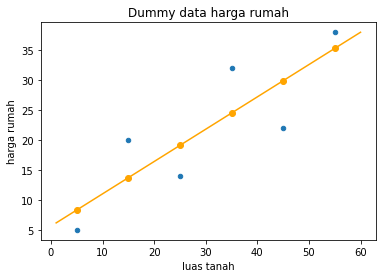

In [29]:
# visualisasikan hasil prediksi
x_dummy = np.arange(1,61).reshape((-1,1))
hasil_prediksi = model.predict(x_dummy)

# data awal
pd.DataFrame({"luas tanah":x.reshape(6,), "harga rumah":y}).plot.scatter(x="luas tanah", y="harga rumah")
plt.title("Dummy data harga rumah")

# garis hasil prediksi
plt.plot(x_dummy, hasil_prediksi, color="orange")

# plot hasil prediksi data awal di garis prediksi
plt.scatter(x, model.predict(x), color="orange")

In [31]:
# evaluasi
r2 = model.score(x, y) # ini data yang kita gunakan untuk testing, kali ini sama dengan data training
print(r2)

0.7158756137479542


polynomial regression adalah saat garisnya bisa berbelok. degree 2 - belok 1 kali, degree 3 - belok 2 kali, dan seterusnya. polynomial regression degree 1 adalah linear regression.

R2 angka yang menunjukkan seberapa dekat hasil regression kita dengan data testing nya. nilai R2 maksimal 1.

- underfitting adalah saat garis regresi kurang mendekati data awal (tidak bisa memprediksi dengan baik, terlalu jauh dari data awal). R2 mendekati 0, kemungkinan underfitting.
- overfitting adalah saat garis regresi terlalu dekat dengan data awal (tidak bisa memprediksi dengan baik, karena terlalu menghafal data awal). kalau R2 mendekati 1, kemungkinan overfitting.

## multiple linear regression
saat fitur lebih dari satu, misal luas rumah dan luas tanah untuk memprediksi harga rumah.

In [35]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

pd.DataFrame({"luas tanah": x.T[0], "luas bangunan": x.T[1], "harga rumah": y})

,luas tanah,luas bangunan,harga rumah
0,0,1,4
1,5,1,5
2,15,2,20
3,25,5,14
4,35,11,32
5,45,15,22
6,55,34,38
7,60,35,43


In [37]:
# data sudah siap
# data preparation - skip
# buat dan latih model
model = LinearRegression().fit(x, y)

# evaluasi model
model.score(x,y)

0.8615939258756775

In [39]:
# buat prediksi
model.predict([[5,1]])

array([8.012953])

# Polynomial Regression
membuat garis regression yang berbelok.

Text(0, 0.5, 'harga rumah')

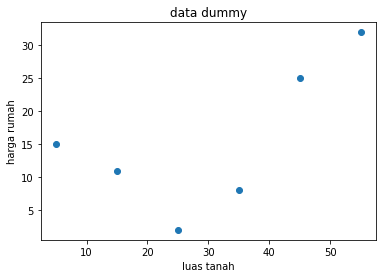

In [44]:
# buat data dummy
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

plt.scatter(x, y)
plt.title("data dummy")
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")

In [45]:
# siapin data
# ubah format data menjadi bentuk polynomial

# buat pengubahnya (transformer)
transformer = PolynomialFeatures(degree=2, include_bias=False)
# latih transformer nya
transformer.fit(x)

# ubah data kita jadi bentuk polynomial
x_poly = transformer.transform(x)

# cara lain, gabung 3 step diatas jadi 1
# x_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

print(x_poly)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [46]:
# buat dan latih model
model = LinearRegression().fit(x_poly, y)

# evaluasi model
model.score(x_poly, y)

0.8908516262498563

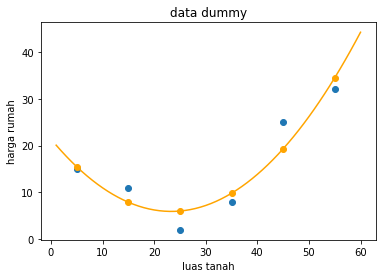

In [51]:
# buat visualisasi
x_dummy = np.arange(1,61).reshape((-1,1))

x_dummy_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_dummy)

# buat prediksi dengan data dummy
hasil_prediksi = model.predict(x_dummy_poly)

# plot data awal
plt.scatter(x, y)
plt.title("data dummy")
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")

# plot x_dummy denga hasil prediksi
plt.plot(x_dummy, hasil_prediksi, color="orange")

# plot data awal kita kalau di garis regression nya ada dimana
plt.scatter(x, model.predict(x_poly), color="orange")

In [55]:
# luas tanah 30, prediksi harga nya berapa?
model.predict([[30, 30**2]])

array([7.21875])

## Bagaimana kalau Polynomial Regression kita Degree n
n = 1,2,3,4...

R2: 0.4065969428801286


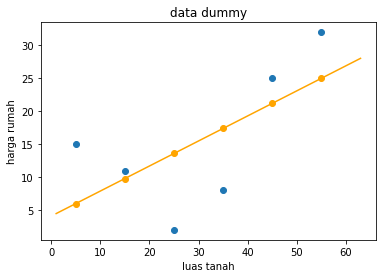

In [65]:
n = 1
start = 1
end = 64

# buat data dummy
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

# ubah jadi bentuk polynomial untuk input data
x_poly = PolynomialFeatures(degree=n, include_bias=False).fit_transform(x)

# buat dan latih model
model = LinearRegression().fit(x_poly, y)

# evaluasi model
print("R2:", model.score(x_poly, y))

# buat visualisasi, bikin dummy data dari x = start sampai x = end
x_dummy = np.arange(start, end).reshape((-1,1))
# bentuk dummy data juga diubah jadi bentuk polynomial
x_dummy_poly = PolynomialFeatures(degree=n, include_bias=False).fit_transform(x_dummy)

# buat prediksi dengan data dummy
hasil_prediksi = model.predict(x_dummy_poly)

# visualisasi data awal
plt.scatter(x, y)
plt.title("data dummy")
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")

# plot x_dummy dengan hasil prediksi
plt.plot(x_dummy, hasil_prediksi, color="orange")

# plot data awal kita kalau di garis regression nya ada dimana
plt.scatter(x, model.predict(x_poly), color="orange")

# Regression dengan Real Data

In [67]:
# import data perumahan di boston
from sklearn import datasets 

data = datasets.load_boston()

In [68]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [71]:
# prep data
# masukkan data ke dalam dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

display(df.head(), df.shape)
display(target.head(), target.shape)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(506, 13)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


(506, 1)

In [72]:
# pakai model LinearRegression sklearn untuk buat dan latih model
model = LinearRegression().fit(df, target)

# evaluasi keakuratan model
print("R2:", model.score(df, target))

R2: 0.7406426641094094


In [74]:
# tambahan: saat prep data, baiknya kita pisahkan data untuk training model dan untuk testing model
# good practice
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2) # 80% training, 20% untuk testing

In [75]:
# bikin model dengan data training saja
model = LinearRegression().fit(x_train, y_train)

# evaluasi dengan data testing saja
print("R2:", model.score(x_test, y_test))

R2: 0.7792569719598503
